# Import Dependencies

In [1]:
import os
import warnings
import requests
import pandas_gbq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Get Data from Endpoint

In [3]:
dir = '/content/gdrive/MyDrive/Capstone Project/Dataset/'
api_url = "https://data.jabarprov.go.id/api-backend/bigdata/dp3akb/od_15436_jml_korban_kekerasan__tingkat_pendidikan_jk_kabupatenk"

In [4]:
skip = 0
limit = 100
total_records = 2214
# those value above is based on metadata

all_data = []

while skip < total_records:
    response = requests.get(api_url, params={'skip': skip, 'limit': limit})

    if response.status_code == 200:
        data = response.json()
        all_data.extend(data['data'])
        skip += limit

    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        break

df = pd.DataFrame(all_data)
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,kategori_pendidikan,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,NA,0,KORBAN,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,TIDAK \nSEKOLAH,0,KORBAN,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,SD,0,KORBAN,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,SLTP,0,KORBAN,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,SLTA,0,KORBAN,2018
...,...,...,...,...,...,...,...,...,...,...
2209,2210,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN,SLTA,0,KORBAN,2022
2210,2211,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN,PERGURUAN TINGGI,0,KORBAN,2022
2211,2212,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN,TK,0,KORBAN,2022
2212,2213,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN,PAUD,0,KORBAN,2022


# Exploratory Data Analysis

In [5]:
df.isna().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_kelamin          0
kategori_pendidikan    0
jumlah                 0
satuan                 0
tahun                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2214 non-null   int64 
 1   kode_provinsi        2214 non-null   int64 
 2   nama_provinsi        2214 non-null   object
 3   kode_kabupaten_kota  2214 non-null   int64 
 4   nama_kabupaten_kota  2214 non-null   object
 5   jenis_kelamin        2214 non-null   object
 6   kategori_pendidikan  2214 non-null   object
 7   jumlah               2214 non-null   int64 
 8   satuan               2214 non-null   object
 9   tahun                2214 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 173.1+ KB


In [7]:
# delete unused columns
delete_columns = [
    'id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'
]

df.drop(columns=delete_columns, inplace=True)

# delete data with missing values
df.dropna(axis=0, inplace=True)

In [8]:
df

,nama_kabupaten_kota,jenis_kelamin,kategori_pendidikan,jumlah,tahun
0,KABUPATEN BOGOR,LAKI-LAKI,NA,0,2018
1,KABUPATEN BOGOR,LAKI-LAKI,TIDAK \nSEKOLAH,0,2018
2,KABUPATEN BOGOR,LAKI-LAKI,SD,0,2018
3,KABUPATEN BOGOR,LAKI-LAKI,SLTP,0,2018
4,KABUPATEN BOGOR,LAKI-LAKI,SLTA,0,2018
...,...,...,...,...,...
2209,KOTA BANJAR,PEREMPUAN,SLTA,0,2022
2210,KOTA BANJAR,PEREMPUAN,PERGURUAN TINGGI,0,2022
2211,KOTA BANJAR,PEREMPUAN,TK,0,2022
2212,KOTA BANJAR,PEREMPUAN,PAUD,0,2022


In [9]:
df['nama_kabupaten_kota'].value_counts()

KABUPATEN BOGOR            82
KABUPATEN KARAWANG         82
KOTA TASIKMALAYA           82
KOTA CIMAHI                82
KOTA DEPOK                 82
KOTA BEKASI                82
KOTA CIREBON               82
KOTA BANDUNG               82
KOTA SUKABUMI              82
KOTA BOGOR                 82
KABUPATEN PANGANDARAN      82
KABUPATEN BANDUNG BARAT    82
KABUPATEN BEKASI           82
KABUPATEN PURWAKARTA       82
KABUPATEN SUKABUMI         82
KABUPATEN SUBANG           82
KABUPATEN INDRAMAYU        82
KABUPATEN SUMEDANG         82
KABUPATEN MAJALENGKA       82
KABUPATEN CIREBON          82
KABUPATEN KUNINGAN         82
KABUPATEN CIAMIS           82
KABUPATEN TASIKMALAYA      82
KABUPATEN GARUT            82
KABUPATEN BANDUNG          82
KABUPATEN CIANJUR          82
KOTA BANJAR                82
Name: nama_kabupaten_kota, dtype: int64

In [10]:
# based above result we should modify our code to see each total regencies cities victim count
# same with another columns
def count_based_on(column_name):
    filtered_df = df.groupby(column_name)['jumlah'].sum().reset_index().sort_values(by='jumlah', ascending=False)
    sns.barplot(x=column_name, y='jumlah', data=filtered_df)
    plt.xticks(rotation=90)
    plt.show()
    return filtered_df

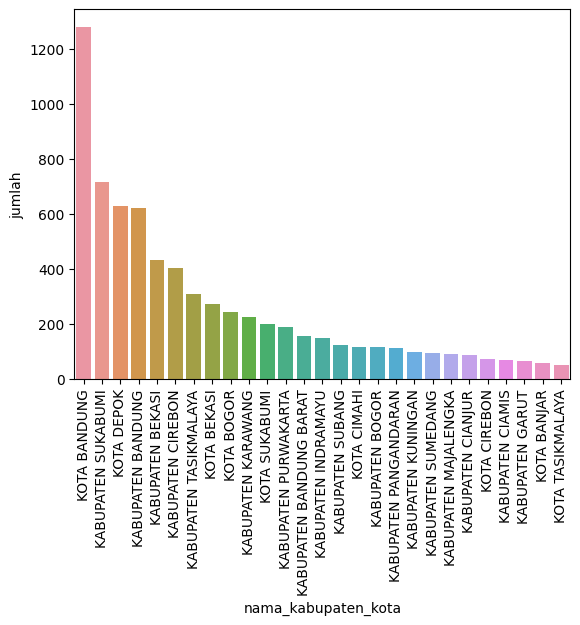

,nama_kabupaten_kota,jumlah
18,KOTA BANDUNG,1280
15,KABUPATEN SUKABUMI,715
24,KOTA DEPOK,628
0,KABUPATEN BANDUNG,619
2,KABUPATEN BEKASI,433
6,KABUPATEN CIREBON,401
17,KABUPATEN TASIKMALAYA,307
20,KOTA BEKASI,272
21,KOTA BOGOR,241
9,KABUPATEN KARAWANG,223


In [11]:
count_based_on('nama_kabupaten_kota')

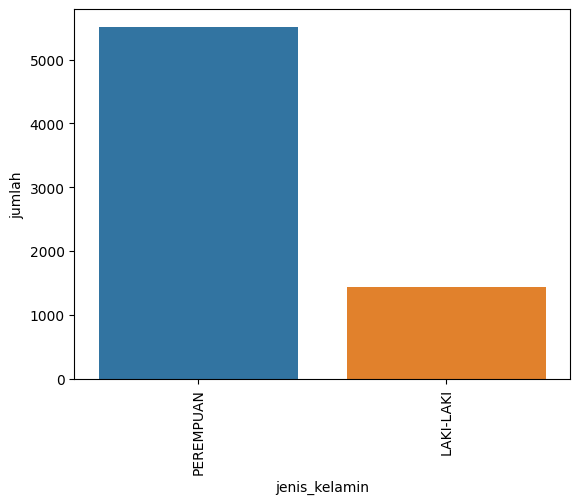

,jenis_kelamin,jumlah
1,PEREMPUAN,5514
0,LAKI-LAKI,1439


In [12]:
count_based_on('jenis_kelamin')

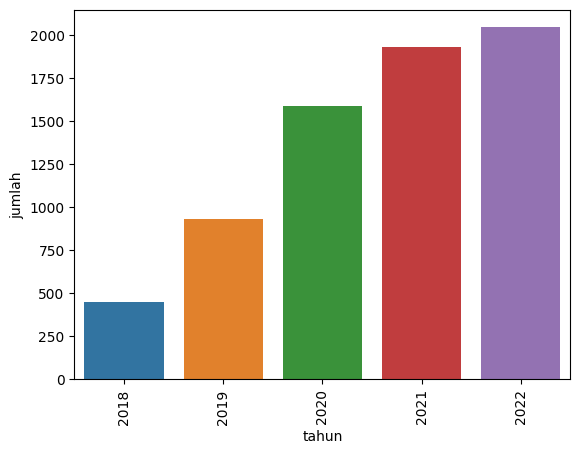

,tahun,jumlah
4,2022,2045
3,2021,1934
2,2020,1587
1,2019,935
0,2018,452


In [13]:
count_based_on('tahun')

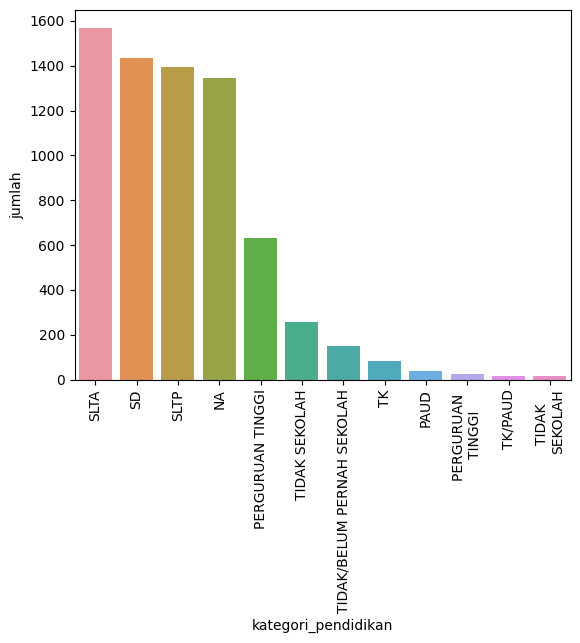

,kategori_pendidikan,jumlah
5,SLTA,1570
4,SD,1434
6,SLTP,1392
0,NA,1343
3,PERGURUAN TINGGI,633
8,TIDAK SEKOLAH,257
9,TIDAK/BELUM PERNAH SEKOLAH,148
10,TK,81
1,PAUD,40
2,PERGURUAN \nTINGGI,24


In [14]:
count_based_on('kategori_pendidikan')

# Handdle Type and Delete Unused Value

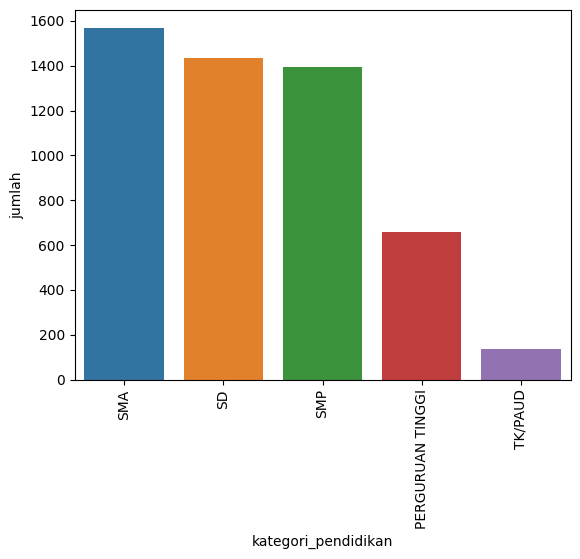

,kategori_pendidikan,jumlah
2,SMA,1570
1,SD,1434
3,SMP,1392
0,PERGURUAN TINGGI,657
4,TK/PAUD,137


In [15]:
replacements = {
    'TIDAK \nSEKOLAH' : 'TIDAK SEKOLAH',
    'PERGURUAN \nTINGGI' : 'PERGURUAN TINGGI',
    'SLTP' : 'SMP',
    'SLTA' : 'SMA',
    'TK' : 'TK/PAUD',
    'PAUD' : 'TK/PAUD',
    'NA' : 'TIDAK SEKOLAH',
    'TIDAK/BELUM PERNAH SEKOLAH' : 'TIDAK SEKOLAH'

}

df.replace(replacements, inplace=True)
df = df[df['kategori_pendidikan'] != 'TIDAK SEKOLAH'] # we want to analyze students only

count_based_on('kategori_pendidikan')

# Add New Useful Feature

In [16]:
# add column umur as request by team
def calculate_umur(row):
    if (row['kategori_pendidikan'] == 'TK/PAUD'):
        return '<5'
    elif row['kategori_pendidikan'] == 'SD':
        return '6-11'
    elif row['kategori_pendidikan'] == 'SMP':
        return '12-14'
    elif row['kategori_pendidikan'] == 'SMA':
        return '15-17'
    elif row['kategori_pendidikan'] == 'PERGURUAN TINGGI':
        return '>18'
    else:
        return 'Unknown'

df['umur'] = df.apply(calculate_umur, axis=1)

In [17]:
# add column latitude longitude to perform some map chart in looker studio
unique_locations = df['nama_kabupaten_kota'].unique()

geolocator = Nominatim(user_agent="MyApp")
location_data = {}

def get_lat_long(location):
    location_info = geolocator.geocode(location)
    if location_info:
        return location_info.latitude, location_info.longitude
    else:
        return None, None

for location in unique_locations:
    location_data[location] = get_lat_long(location)

df[['latitude', 'longitude']] = df['nama_kabupaten_kota'].apply(lambda x: pd.Series(location_data.get(x, (None, None))))
df['location'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [18]:
# cek final data
df

,nama_kabupaten_kota,jenis_kelamin,kategori_pendidikan,jumlah,tahun,umur,location
2,KABUPATEN BOGOR,LAKI-LAKI,SD,0,2018,6-11,"-6.5453255,107.00174246832204"
3,KABUPATEN BOGOR,LAKI-LAKI,SMP,0,2018,12-14,"-6.5453255,107.00174246832204"
4,KABUPATEN BOGOR,LAKI-LAKI,SMA,0,2018,15-17,"-6.5453255,107.00174246832204"
5,KABUPATEN BOGOR,LAKI-LAKI,PERGURUAN TINGGI,0,2018,>18,"-6.5453255,107.00174246832204"
6,KABUPATEN BOGOR,LAKI-LAKI,TK/PAUD,0,2018,<5,"-6.5453255,107.00174246832204"
...,...,...,...,...,...,...,...
2209,KOTA BANJAR,PEREMPUAN,SMA,0,2022,15-17,"-7.3695648,108.5415225"
2210,KOTA BANJAR,PEREMPUAN,PERGURUAN TINGGI,0,2022,>18,"-7.3695648,108.5415225"
2211,KOTA BANJAR,PEREMPUAN,TK/PAUD,0,2022,<5,"-7.3695648,108.5415225"
2212,KOTA BANJAR,PEREMPUAN,TK/PAUD,0,2022,<5,"-7.3695648,108.5415225"


# Save Cleaned Data into Drive and BigQuerry

In [19]:
df.to_csv(os.path.join(dir, 'jabar-open-data/cleaned_dataset.csv'), index=False)
pandas_gbq.to_gbq(df, destination_table='', project_id='', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6921.29it/s]
